In [6]:
import librosa
import numpy
import matplotlib.pylab as plt
from librosa import display

In [7]:
path = 'C:/Users/Lenovo/Desktop'
audio = '/missing_F.wav'
audio , sr = librosa.load(path+audio)

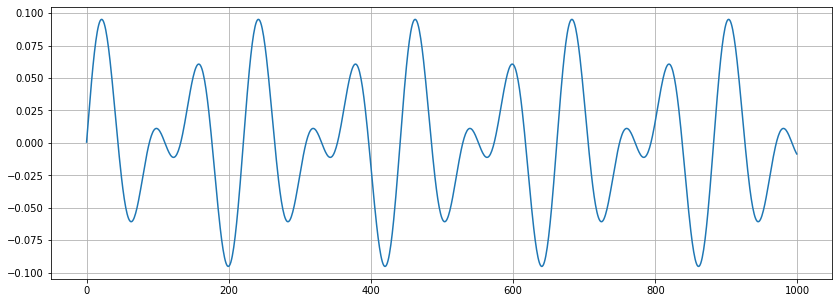

In [9]:
#Olhando para um período do sinal

n0 = 0 #chosse lower end
n1 = 1000 #choose upper end in ms
plt.figure(figsize=(14, 5))
plt.plot(audio[n0:n1])
plt.grid()

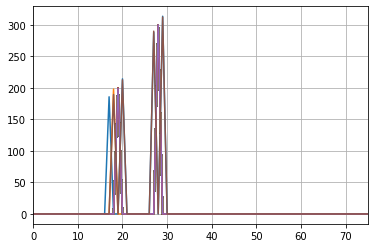

In [27]:
#https://ccrma.stanford.edu/~jos/sasp/Sinusoidal_Peak_Interpolation.html
import pandas as pd
def extract_max(pitches,magnitudes, shape):
    new_pitches = []
    new_magnitudes = []
    for i in range(0, shape[1]):
        new_pitches.append(numpy.max(pitches[:,i]))
        new_magnitudes.append(numpy.max(magnitudes[:,i]))
    return (new_pitches,new_magnitudes)

pitches, magnitudes = librosa.core.piptrack(y=audio, sr=sr)
extract_max(pitches, magnitudes, numpy.shape(pitches))
plt.plot(pitches)
plt.xlim(0,75)
plt.grid()


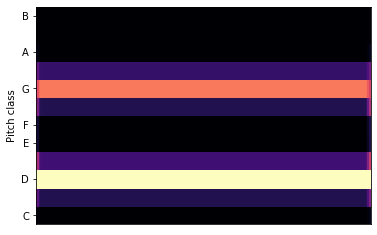

In [30]:
chroma_stft = librosa.feature.chroma_stft(y=audio, sr=sr, n_chroma=12, n_fft=4096)
chroma_cq = librosa.feature.chroma_cqt(y=audio, sr=sr)

plt.figure()
librosa.display.specshow(chroma_stft, y_axis='chroma')